## NBC on IMDB Reviews

#### Author - Ishita Kapur

In [1]:
#import the required libraries
import os
import re
import csv
import operator
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Title: Combine a folder of text files into a CSV with each content in a cell
# Author: Nathaniel Verhaaren
# Date: 01.28.2017
# Code version: 1
# Availability: 
#  https://stackoverflow.com/questions/41913147/combine-a-folder-of-text-files-into-a-csv-with-each-content-in-a-cell
#function for collecting data from multiple files and storing data in a csv and removing unwanted characters
def collectDataFromTextFiles(dirpath, output_file):
    if os.path.exists(output_file):
        os.remove(output_file)
    for file_path in dirpath:
        with open(output_file, 'a', encoding="utf8") as outfile:
            csvout = csv.writer(outfile)
            #csvout.writerow(['FileName', 'Content'])
            files = os.listdir(file_path)
            for filename in files:
                with open(file_path + '/' + filename, encoding="utf8") as afile:
                    rev_file = file_path[-3:]
                    csvout.writerow([afile.read(), rev_file])
                    afile.close()
            outfile.close()
    df = pd.read_csv(output_file, header=None)
    df.iloc[:, 0] = df.iloc[:, 0].str.replace(r"[^a-zA-Z\d\s]+", " ")
    df.iloc[:, 0] = df.iloc[:, 0].str.lower()
    df = df.sample(frac=1)
    df.to_csv(output_file, index=False)

In [3]:
#collecting training data from multiple text files into a single csv
train_dirpath = [r'D:\UTA Spring 2020 Sem II\CSE 5334\Assignments\Assignment_3\aclImdb\train\pos',
                 r'D:\UTA Spring 2020 Sem II\CSE 5334\Assignments\Assignment_3\aclImdb\train\neg']
train_data = r'D:\UTA Spring 2020 Sem II\CSE 5334\Assignments\Assignment_3\train_data.csv'
collectDataFromTextFiles(train_dirpath, train_data)

In [4]:
#collecting test data from multiple text files into a single csv
test_dirpath = [r'D:\UTA Spring 2020 Sem II\CSE 5334\Assignments\Assignment_3\aclImdb\test\pos',
                r'D:\UTA Spring 2020 Sem II\CSE 5334\Assignments\Assignment_3\aclImdb\test\neg']
test_data = r'D:\UTA Spring 2020 Sem II\CSE 5334\Assignments\Assignment_3\test_data.csv'
collectDataFromTextFiles(test_dirpath, test_data)

### Part a)
#### Dividing the dataset

In [5]:
#reading training and test from the csv file
train_df = pd.read_csv(train_data, header=0)
test_df = pd.read_csv(test_data, header=0)

In [6]:
num_pos_train_df = train_df.iloc[:,1].str.contains('pos').value_counts()[True]
print('Number of Positive Reviews is Training Set :', num_pos_train_df)
num_neg_train_df = len(train_df) - num_pos_train_df
print('Number of Negative Reviews is Training Set :', num_neg_train_df)

Number of Positive Reviews is Training Set : 12500
Number of Negative Reviews is Training Set : 12500


### Part b)
#### Building a Vocabulary List

In [7]:
#counting the number of reviews containing a particular word
def docsContainingWord(dataset):
    count_from_set = collections.defaultdict(int)
    rev_list = dataset.iloc[:,0].to_list()
    doc_words = []
    for rev in rev_list:
        words = re.findall('[^\W\d_]+', rev)
        words = [w for w in words if len(w) > 1]
        doc_words.append(words)
    for vlist in doc_words:
        for i in set(vlist):
            count_from_set[i] += 1
    return count_from_set

#dataframe containng positive reviews
pos_train_df = train_df[(train_df.iloc[:,1].str.contains('pos'))]
#dataframe containng negative reviews
neg_train_df = train_df[(train_df.iloc[:,1].str.contains('neg'))]
#count of training data reviews containing a particular word
docs_cont_word = dict(docsContainingWord(train_df))
#count of positive training data reviews containing a particular word
pos_docs_cont_word = dict(docsContainingWord(pos_train_df))
#count of negative training data reviews containing a particular word
neg_docs_cont_word = dict(docsContainingWord(neg_train_df))

#### Vocabulary List

In [8]:
#vocabulary list from training data
vocab_dict = dict(sorted(docs_cont_word.items(), key=operator.itemgetter(1),reverse=True))
vocabulary_list = [k for k, v in vocab_dict.items() if v >= 5]
print('First few Words in the Vocabulary List are :\n\n', vocabulary_list[:100])

First few Words in the Vocabulary List are :

 ['the', 'and', 'of', 'to', 'this', 'is', 'it', 'in', 'that', 'but', 'for', 'with', 'was', 'as', 'on', 'movie', 'not', 'br', 'have', 'one', 'be', 'film', 'are', 'you', 'all', 'at', 'an', 'so', 'by', 'from', 'like', 'who', 'they', 'there', 'if', 'his', 'out', 'just', 'about', 'he', 'or', 'has', 'what', 'some', 'good', 'can', 'more', 'when', 'time', 'very', 'up', 'even', 'only', 'no', 'would', 'my', 'see', 'really', 'story', 'which', 'well', 'had', 'me', 'than', 'much', 'their', 'get', 'were', 'other', 'been', 'do', 'most', 'don', 'her', 'also', 'into', 'first', 'made', 'how', 'great', 'because', 'will', 'people', 'make', 'way', 'could', 'we', 'bad', 'after', 'any', 'too', 'then', 'them', 'she', 'watch', 'think', 'acting', 'movies', 'seen', 'its']


#### Reverse Indexing

In [9]:
#Building a Reverse Index
rev_idx_dict = {}
value = 0
for idx in vocabulary_list:
    rev_idx_dict[idx] = value
    value += 1
print('First few Words with reverse indexing are :\n\n', {k: rev_idx_dict[k] for k in list(rev_idx_dict)[:100]})

First few Words with reverse indexing are :

 {'the': 0, 'and': 1, 'of': 2, 'to': 3, 'this': 4, 'is': 5, 'it': 6, 'in': 7, 'that': 8, 'but': 9, 'for': 10, 'with': 11, 'was': 12, 'as': 13, 'on': 14, 'movie': 15, 'not': 16, 'br': 17, 'have': 18, 'one': 19, 'be': 20, 'film': 21, 'are': 22, 'you': 23, 'all': 24, 'at': 25, 'an': 26, 'so': 27, 'by': 28, 'from': 29, 'like': 30, 'who': 31, 'they': 32, 'there': 33, 'if': 34, 'his': 35, 'out': 36, 'just': 37, 'about': 38, 'he': 39, 'or': 40, 'has': 41, 'what': 42, 'some': 43, 'good': 44, 'can': 45, 'more': 46, 'when': 47, 'time': 48, 'very': 49, 'up': 50, 'even': 51, 'only': 52, 'no': 53, 'would': 54, 'my': 55, 'see': 56, 'really': 57, 'story': 58, 'which': 59, 'well': 60, 'had': 61, 'me': 62, 'than': 63, 'much': 64, 'their': 65, 'get': 66, 'were': 67, 'other': 68, 'been': 69, 'do': 70, 'most': 71, 'don': 72, 'her': 73, 'also': 74, 'into': 75, 'first': 76, 'made': 77, 'how': 78, 'great': 79, 'because': 80, 'will': 81, 'people': 82, 'make': 83, '

20 most frequent words:


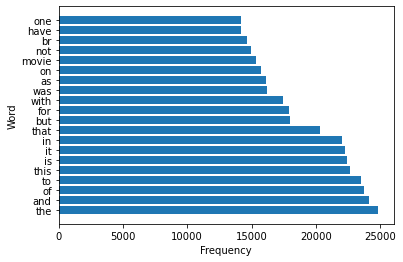

In [10]:
print('20 most frequent words:')
most_common_words = {k:vocab_dict[k] for k in vocabulary_list[:20]}
plt.barh(*zip(*most_common_words.items()))
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

### Part c)
#### Calculating Probabilities

In [11]:
#P[“the”]
print('Calculating the PROBABILITY of OCCURRENCE: \n')
count_docs_the = docs_cont_word['the']
print('Number of documents containing the word "the" :', count_docs_the)
total_docs = len(train_df)
print('Total number of documents :', total_docs)
prob_the = count_docs_the / total_docs
print('Probability of occurrence of the word "the" :', prob_the)

#P[“the” | Positive]
print('\n\nCalculating the CONDITIONAL PROBABILITY based on Sentiment: \n')
count_pos_docs_the = pos_docs_cont_word['the']
print('Number of positive documents containing the word "the" :', count_pos_docs_the)
total_pos_docs = len(pos_train_df)
total_neg_docs = len(neg_train_df)
print('Total number of positive documents :', total_pos_docs)
prob_the_pos = count_pos_docs_the / total_pos_docs
print('Probability of occurrence of the word "the" given the document is positive :', prob_the_pos)

Calculating the PROBABILITY of OCCURRENCE: 

Number of documents containing the word "the" : 24793
Total number of documents : 25000
Probability of occurrence of the word "the" : 0.99172


Calculating the CONDITIONAL PROBABILITY based on Sentiment: 

Number of positive documents containing the word "the" : 12381
Total number of positive documents : 12500
Probability of occurrence of the word "the" given the document is positive : 0.99048


### Part d)
#### Performing 5 Fold cross validation

In [12]:
# Title: 
# Author: Dawei
# Date: 02.17.2019
# Code version: 1
# Availability:
#  https://stackoverflow.com/questions/54730276/how-to-randomly-split-a-dataframe-into-several-smaller-dataframes
shuffled = train_df.sample(frac=1)
result = np.array_split(shuffled, 5)
for part in result:
    print(part)

                                                       0    1
3245   this is simply the funniest movie i ve seen in...  pos
16243  this is a typical steele novel production in t...  neg
14299  this movie got off to an interesting start  do...  neg
16014  it s been so long since i ve seen this movie  ...  pos
6332   i m stunt  i must admit i never saw a movie wi...  pos
...                                                  ...  ...
15087  this movie had good intentions and a good stor...  neg
18745  this movie was so very badly written  the char...  neg
24251  man about the house is a true situation comedy...  pos
15189  as other reviewers have noted  this is an unju...  pos
22225  normally  i have no problem with a movie or st...  neg

[5000 rows x 2 columns]
                                                       0    1
13943  my take on this  at our local festival where p...  pos
21636  if john waters had written and directed  house...  neg
14349  the story has been told before  a dead

In [13]:
#function for Naive Bayes Classification
def naive_bayes(train, test, smoothing):
    word_in_train = docsContainingWord(train)
    df_train_pos = train[(train.iloc[:,1].str.contains('pos'))]
    word_in_train_pos = docsContainingWord(df_train_pos)
    df_train_neg = train[(train.iloc[:,1].str.contains('neg'))]
    word_in_train_neg = docsContainingWord(df_train_neg)
    sum_word_in_train_pos = sum(word_in_train_pos.values())
    sum_word_in_train_neg = sum(word_in_train_neg.values())
    test_class_pred = []
    for review in test:
        rev_words = review.split(' ')
        rev_words_dict = dict(collections.Counter(rev_words))
        prob_key_pos = prob_key_neg = 1
        prob_rev_pos = {}
        prob_rev_neg = {}
        #Laplace Estimates
        if smoothing == 'yes':
            for key in rev_words_dict.keys():
                prob_key_pos *= rev_words_dict[key] * (word_in_train_pos.get(key, 0) + 1) / (len(df_train_pos) + sum_word_in_train_pos)
                #print(prob_key_pos)
            prob_rev_pos[review] = prob_key_pos
            for key in rev_words_dict.keys():
                prob_key_neg *= rev_words_dict[key] * (word_in_train_neg.get(key, 0) + 1) / (len(df_train_neg) + sum_word_in_train_neg)
                #print(prob_key_neg)
            prob_rev_neg[review] = prob_key_neg
        else:
            for key in rev_words_dict.keys():
                prob_key_pos *= rev_words_dict[key] * (word_in_train_pos.get(key, 0)) / (len(df_train_pos))
                #print(prob_key_pos)
            prob_rev_pos[review] = prob_key_pos
            for key in rev_words_dict.keys():
                prob_key_neg *= rev_words_dict[key] * (word_in_train_neg.get(key, 0)) / (len(df_train_neg))
                #print(prob_key_neg)
            prob_rev_neg[review] = prob_key_neg
        if(prob_key_pos > prob_key_neg):
            class_rev = 'pos'
        else:
            class_rev = 'neg'
        test_class_pred.append(class_rev)
    return test_class_pred

#performing cross validation
def performingCrossValidation(result, smoothing):
    folds = result
    scores = list()
    fold_prediction_accuracy = {}
    for i in range(5):
        print('Performing Naive Bayes Classification on Fold :', i+1)
        cv_train = folds.copy()
        cv_test = folds[i]
        del cv_train[i]
        cv_train = pd.concat(cv_train, sort=False)
        cv_test_rev_list = cv_test.iloc[:,0].to_list()
        cv_test_rev_label = cv_test.iloc[:,1].to_list()
        prediction = naive_bayes(cv_train, cv_test_rev_list, smoothing)
        accurate_pred = 0
        for val in range(len(cv_test_rev_label)):
            if(prediction[val] == cv_test_rev_label[val]):
                accurate_pred +=1
        accuracy = accurate_pred / len(cv_test_rev_label) * 100
        print('Accuracy of Fold is : {0:.2f}'.format(accuracy))
        fold_prediction_accuracy['fold_%s'%(i+1)] = accuracy
    
    average_accuracy = sum(fold_prediction_accuracy.values())/len(fold_prediction_accuracy)
    print('\nMean Accuracy : {0:.2f}'.format(average_accuracy))
    return fold_prediction_accuracy

### Part e)
#### Calculating accuracies using Development dataset - Performing 5 Fold cross validation.

In [14]:
print('\nPerforming 5 Fold Cross Validation')
fold_accuracy_no_smoothing = performingCrossValidation(result, smoothing = 'no')


Performing 5 Fold Cross Validation
Performing Naive Bayes Classification on Fold : 1
Accuracy of Fold is : 50.56
Performing Naive Bayes Classification on Fold : 2
Accuracy of Fold is : 49.42
Performing Naive Bayes Classification on Fold : 3
Accuracy of Fold is : 49.76
Performing Naive Bayes Classification on Fold : 4
Accuracy of Fold is : 50.04
Performing Naive Bayes Classification on Fold : 5
Accuracy of Fold is : 50.22

Mean Accuracy : 50.00


#### Comparing the effect of smoothing by comparing accuracies

In [15]:
print('\n\nAffect of Smoothing')
fold_accuracy_yes_smoothing = performingCrossValidation(result, smoothing = 'yes')



Affect of Smoothing
Performing Naive Bayes Classification on Fold : 1
Accuracy of Fold is : 62.42
Performing Naive Bayes Classification on Fold : 2
Accuracy of Fold is : 61.62
Performing Naive Bayes Classification on Fold : 3
Accuracy of Fold is : 62.08
Performing Naive Bayes Classification on Fold : 4
Accuracy of Fold is : 61.14
Performing Naive Bayes Classification on Fold : 5
Accuracy of Fold is : 61.42

Mean Accuracy : 61.74


In [16]:
accuracy_df = pd.DataFrame([fold_accuracy_no_smoothing, fold_accuracy_yes_smoothing]).T
accuracy_df.columns = ['Smoothing = No', 'Smoothing = Yes']
print(accuracy_df)

        Smoothing = No  Smoothing = Yes
fold_1           50.56            62.42
fold_2           49.42            61.62
fold_3           49.76            62.08
fold_4           50.04            61.14
fold_5           50.22            61.42


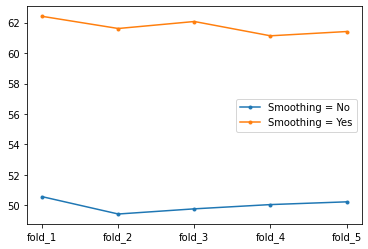

In [17]:
plt.figure()

x = accuracy_df.index
y1 = accuracy_df['Smoothing = No']
y2 = accuracy_df['Smoothing = Yes']

plt.plot(x, y1, marker='.', label='Smoothing = No')
plt.plot(x, y2, marker='.', label='Smoothing = Yes')
plt.legend()
plt.show()

Smoothing using *Laplace Estimate* improves the performance of the model. When smoothing was not performed and a word was missed out in the training set, the probabilities of the entire review computed to zero. But with smoothing, the probabilities do not become zero if a particular word is missed out in the training set as if one of the conditional probabilities is zero, then the entire expression computing probabilities becomes zero. It can be noted from the above accuracies that Smoothing makes the classifier peform better.

#### Derving top 10 words that predict POSITIVE and NEGATIVE class

In [18]:
pos_w = list(pos_docs_cont_word.keys())
neg_w = list(neg_docs_cont_word.keys())
all_w = list(set(pos_w + neg_w))
prob_pos_w = {}
prob_neg_w = {}
for w in all_w:
    prob_pos_w[w] = ((pos_docs_cont_word.get(w, 0) / total_pos_docs)*(total_pos_docs / total_docs))/ (docs_cont_word.get(w, 0))
sorted_prob_pos_w = dict(sorted(prob_pos_w.items(), key=operator.itemgetter(1),reverse=True)[:10])
print('Top 10 words that predict POSITIVE class: ')
top_w_pos = list(sorted_prob_pos_w.keys())
for item in top_w_pos:
    print(item)
for w in all_w:
    prob_neg_w[w] = ((neg_docs_cont_word.get(w, 0) / total_neg_docs)*(total_neg_docs / total_docs))/ (docs_cont_word.get(w, 0))
sorted_prob_neg_w = dict(sorted(prob_neg_w.items(), key=operator.itemgetter(1),reverse=True)[:10])
print('\n\nTop 10 words that predict NEGATIVE class: ')
top_w_neg = list(sorted_prob_neg_w.keys())
for item in top_w_neg:
    print(item)

Top 10 words that predict POSITIVE class: 
deardon
masami
amano
mcconnohie
gaionsbourg
aryans
bombardiers
supermutant
incursion
ngoombujarra


Top 10 words that predict NEGATIVE class: 
incher
dumpsters
abominations
ubik
montauge
overwork
panhandlers
creepazoid
prudery
glanse


### Part f)
#### Calculating the final accuracy using the Test dataset and Optimal Hyperparameters

In [19]:
test_rev_list = test_df.iloc[:,0].to_list()
test_rev_label = test_df.iloc[:,1].to_list()
predict_test = naive_bayes(train_df, test_rev_list, smoothing = 'yes')
accurate_test = 0
for val in range(len(test_rev_label)):
    if(predict_test[val] == test_rev_label[val]):
        accurate_test +=1
final_accuracy = accurate_test / len(test_rev_label) * 100
print('Accuracy of Test Data Set is : \033[1m{0:.2f}\033[0m'.format(final_accuracy))

Accuracy of Test Data Set is : 61.45


### References

https://stackoverflow.com/questions/41913147/combine-a-folder-of-text-files-into-a-csv-with-each-content-in-a-cell
                                                            - for collecting data from text files into a csv

https://stackoverflow.com/questions/54730276/how-to-randomly-split-a-dataframe-into-several-smaller-dataframes
                                                            - for splitting a dataframe into multiple dataframes